In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.interpolate import interp1d

pi = math.pi

In [2]:
lcp = np.loadtxt('lcpSpectrum.txt')
rcp = np.loadtxt('rcpSpectrum.txt')

orderarr = np.loadtxt('orderlist.txt', dtype=int)

In [3]:
marr = lcp[:, 0]
lcp = lcp[:, 1:]
rcp = rcp[:, 1:]
print(marr)

[-3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4
 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4
  2.6  2.8  3. ]


In [4]:

Ndat = len(lcp[:, 0])
Norder = len(lcp[0, :])

In [5]:
cdarr = np.zeros( (Ndat, Norder) )
for i in range(Ndat):
    for j in range(Norder):
        cdarr[i, j] = (lcp[i ,j] - rcp[i, j]) / (lcp[i, j] + rcp[i, j])

In [6]:
orderarr

array([ 9, 11, 13, 15, 17, 19, 21])

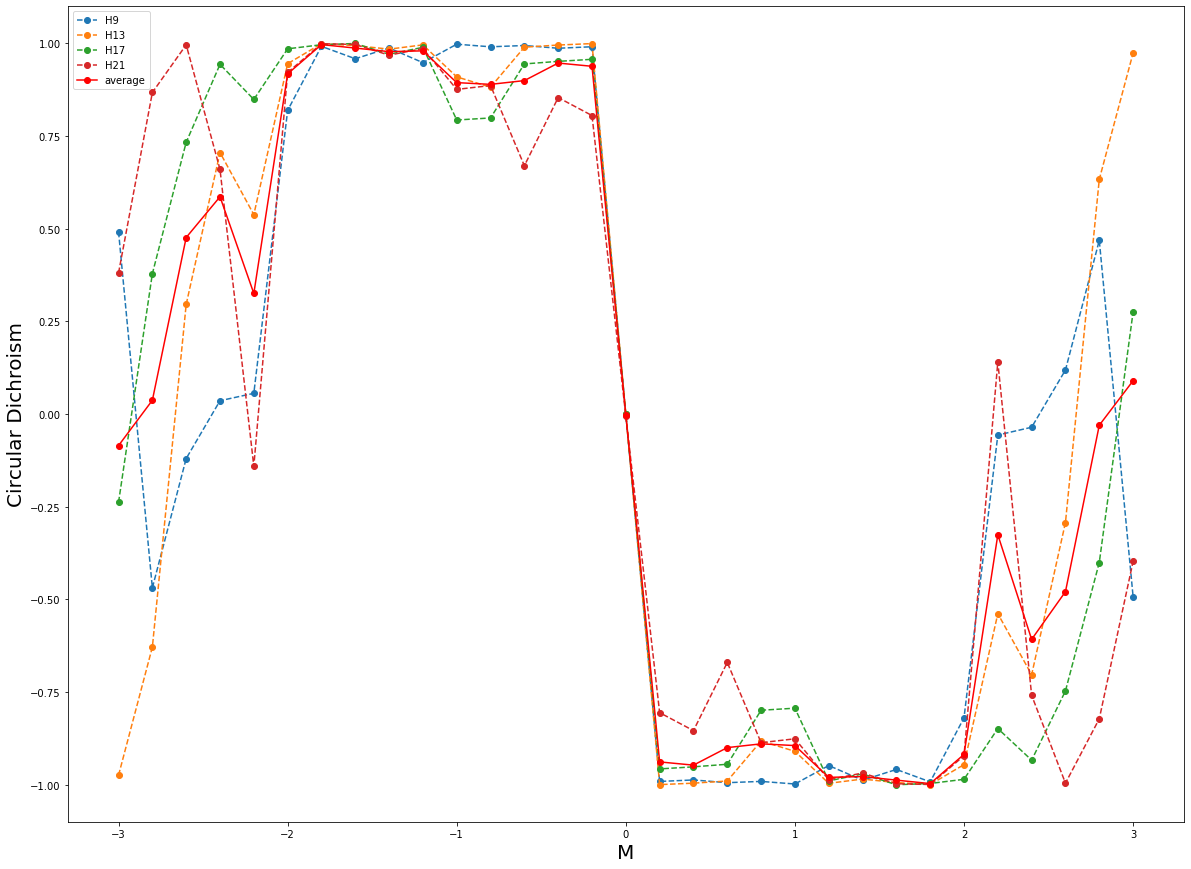

<Figure size 432x288 with 0 Axes>

In [7]:
'''averagearr = np.zeros(Ndat)
for i in range(Ndat):
    for j in [0, 2, 4, 6]:
        averagearr[i] += cdarr[i, j]
    averagearr[i] /= 4
fig = plt.figure(figsize=(20,15))
for i in range(Norder):
    if ((orderarr[i]-1)%4 != 0):
        continue
    plt.plot(marr, cdarr[:, i], 'o--', label='H'+str(orderarr[i]))
plt.plot(marr, averagearr, 'ro-', label='average')
plt.xlabel('M', fontsize=20)
plt.ylabel('Circular Dichroism', fontsize=20)
plt.legend()
plt.show()
plt.savefig('CircularDichroism.png')'''


Length egap =  11    Np  =  11

egap =  [0.13780996 0.06232278 0.00798978 0.08732487 0.11353278 0.03844766
 0.03859083 0.11365696 0.08738563 0.01238014 0.06295116]


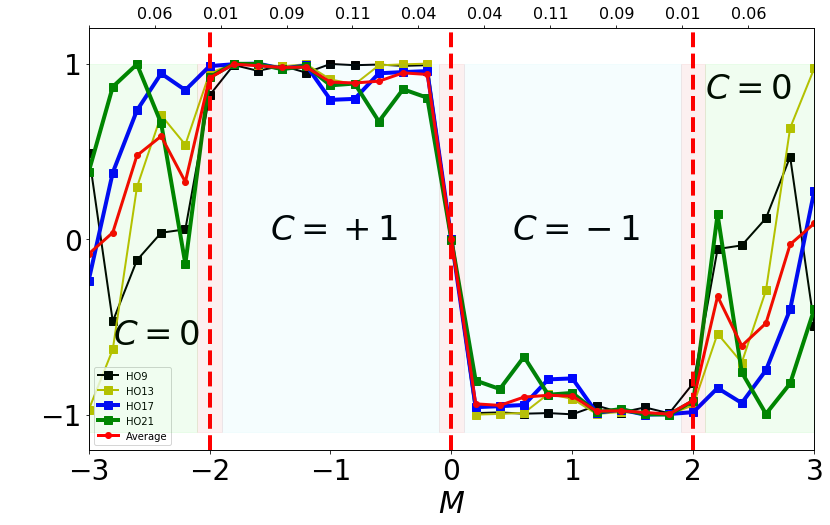

In [11]:
egap = [0.13780995815870623,
0.11024796652696495,
0.08268597489522372,
0.0551239832634825,
0.02756199163174128,
5.012169450837847e-17,
0.02756199163174128,
0.0551239832634825,
0.08268597489522375,
0.11024796652696497,
0.13780995815870623,
0.11027316781581559,
0.08274178199362908,
0.055240928669274034,
0.027861167929983475,
0.004500657953900623,
0.02799274782920795,
0.05537380884007886,
0.08287490721142261,
0.1104063791207853,
0.13782365194738902,
0.11029840363463261,
0.08279760514651376,
0.05535770729594939,
0.028157323408775383,
0.006365589638445475,
0.028417131571644303,
0.05562259223994828,
0.0830634632894591,
0.11056460493848573,
0.13809001253596823]
# match same parameters with Alexis
corotindex = [0, 2, 4, 6]
width = 12.
hight = width/1.62

fig     = plt.figure(figsize=(width,hight) )
ax      = fig.add_axes([0.135, 0.14, 0.84, 0.79])

averagearr = np.zeros(Ndat)
for i in range(Ndat):
    for j in corotindex:
        averagearr[i] += cdarr[i, j]
    averagearr[i] /= len(corotindex)
sw=8
int0=0
p4,=plt.plot(marr, cdarr[:, corotindex[0]], 'ks-', lw=2,markersize=sw )
p5,=plt.plot(marr, cdarr[:, corotindex[1]], 'ys-', lw=2,markersize=sw )
p6,=plt.plot(marr, cdarr[:, corotindex[2]], 'bs-', lw=4,markersize=sw )
p7,=plt.plot(marr, cdarr[:, corotindex[3]], 'gs-', lw=4,markersize=sw )

p9,=plt.plot(marr, averagearr, 'ro-', lw=3 )
plt.legend([p4, p5, p6, p7,  p9], ['HO9','HO13','HO17','HO21','Average'],loc='lower left')

plt.xlabel(r'$ M$ ', fontsize=30)

plt.ylabel('  ', fontsize=30)
plt.tick_params(labelsize=28)


xmin    = marr[0]
xmax    = marr[-1]
ymin    = -1.2
ymax    = 1.2
shift0  = 0.1
xdown = -2.
xmiddle = 0.
xup = 2.

plt.ylim( ymin, ymax )
plt.xlim( xmin, xmax )
plt.plot([xup,xup],     [-ymax,ymax],    'r--',  lw=4)
plt.plot([xmiddle,xmiddle], [-ymax,ymax],    'r--',  lw=4)
plt.plot([xdown,xdown], [-ymax,ymax],    'r--',  lw=4)

#plt.text(.2, 1.26, "(d)", fontsize=34, color="k")

plt.text(xdown-0.8, -0.6, r"$C=0$", fontsize=34, color="k")
plt.text(xmiddle-1.5, 0.0, r"$C=+1$", fontsize=34, color="k")
plt.text(xup-1.5, 0.0, r"$C=-1$", fontsize=34, color="k")
plt.text(xup+0.1, 0.8, r"$C=0$", fontsize=34, color="k")

ax1     = plt.gca()
ax2     = ax1.twiny()

Mt2New  = np.arange(-max(marr),max(marr),2*max(marr)/11.)
ax2.set_xticks( Mt2New )
Npt2    = len(Mt2New)

f       = interp1d( marr, egap, kind='cubic' )
egap1   = f(Mt2New)
ticks1  = []
print('\nLength egap = ', len(egap1), '   Np  = ', Npt2)
for n in range(0,Npt2):
    if n==0:
        ticks1.append(' ')
    else:
        ticks1.append('%.2f'%(egap1[n]*1.))
print('\negap = ',egap1)
plt.yticks([-1,0,1])
ax2.set_xticklabels(ticks1)
ax2.set_xlim( xmin, xmax )
shift0  = 0.1
hd      = -1.1

plt.fill_between( [xmin, xdown-shift0], [1,1], [hd,hd], color=[0.0,0.9,0.], alpha=0.057 )
plt.fill_between( [xdown-shift0, xdown+shift0], [1,1], [hd,hd], color=[0.8,0.0,0.], alpha=0.057 )
plt.fill_between( [xdown+shift0,xmiddle-shift0], [1,1], [hd,hd], color=[0.0,0.8,0.99], alpha=0.04 )
plt.fill_between( [xmiddle-shift0, xmiddle+shift0], [1,1], [hd,hd], color=[0.8,0.0,0.], alpha=0.057 )
plt.fill_between( [xmiddle+shift0,xup-shift0], [1,1], [hd,hd], color=[0.0,0.8,0.99], alpha=0.04 )
plt.fill_between( [xup-shift0, xup+shift0], [1,1], [hd,hd], color=[0.8,0.0,0.], alpha=0.057 )
plt.fill_between( [xup+shift0, xmax], [1,1], [hd,hd], color=[0.0,0.9,0.], alpha=0.057 )

xmin    =  marr[0]
xmax    =  marr[-1]
plt.tick_params( labelsize=16 )
plt.ylim( ymin, ymax )
plt.xlim( xmin, xmax )
fname='Dichroism__M_-3_3__.pdf'
fileName     = fname
plt.savefig(fileName, dpi = 400)

plt.show()